<a href="https://colab.research.google.com/github/EnggRutuja/DATA-SCIENCE-INTERNSHIP/blob/main/casestudy_7_blackfridaysales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd              #pd is an Alias

#Dealing with Missing Values
#Dealing with outliers
#Converting into categorical or numerical
#Dealing with Imbalance
#Feature selection
#Dimentionality Reduction

df=pd.read_csv("test.csv")

#Preparing X and Y

X = df.drop('User_ID', axis=1)  # Change 'User_Id' to 'User_ID'
X = X.drop('Product_Category_3', axis=1)
Y = df['Product_Category_3']
#print(X)
#print(Y)

# Feature Selection 1
'''
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featuresScores = pd.concat([dfcolumns, dfscores], axis=1)
featuresScores.columns = ['Specs', 'Score']

print(featuresScores)
'''
'''
#Feature Selection 2

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_)

feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance.nlargest(4).plot(kind='barh')
plt.show()
'''

#Numerical to Categorical

from sklearn.preprocessing import LabelEncoder


'''
df['SepalLengthCm']=pd.cut(df['SepalLengthCm'],3,labels=['0','1','2'])
df['SepalWidthCm']=pd.cut(df['SepalWidthCm'],3,labels=['0','1','2'])
df['PetalLengthCm']=pd.cut(df['PetalLengthCm'],3,labels=['0','1','2'])
df['PetalWidthCm']=pd.cut(df['PetalWidthCm'],3,labels=['0','1','2'])

print(df)
'''


'''
X = df.drop('Id', axis=1)
X = X.drop('Species', axis=1)
Y = df['Species']
print(Y)
le=LabelEncoder()
le.fit(Y)
Y = le.transform(Y)
print(Y)

'''


#Categorical to Numerical
'''
le=LabelEncoder()
le.fit(Y)
Y = le.transform(Y)

'''

#Dealing with missing values

'''
1. Use Drop (df.drop())
2. use Replace (df.replace("back","DOS"))
3. Fill NA ()

print(df.isnull().sum())
df['Item_Weight'].fillna((df['Item_Weight'].mean()/.median()/.mode()), inplace=True) #Imputing Neurimical Values

df['Outlet_Size'].fillna(('Medium'), inplace=True)  #Imputing Categorical Values
'''


#Oversampling and Under Sampling

'''
#a = (df['Species'] == 'Iris-setosa').sum()
#print(a)
from collections import Counter
print(Counter(Y))
from imblearn.over_sampling import RandomOverSampler     #Random OverSampling
ros=RandomOverSampler(random_state=0)
X, Y = ros.fit_resample(X,Y)
print(Counter(Y))
'''

'''
from imblearn.over_sampling import SMOTE                 #Synthetic Minority Oversampling (SMOTE) oversampling
sms=SMOTE(random_state=0)
X, Y=sms.fit_resample(X,Y)

from imblearn.under_sampling import RandomUnderSampler   #Random UnderSampling
rus=RandomUnderSampler(random_state=0)
X, Y=rus.fit_resample(X,Y)

'''

'''
#Identifying Outliers by ploting

from matplotlib import pyplot as plt
import seaborn as sns
sns.boxplot(df['SepalLengthCm'])
plt.show()
'''


#Dealing with Outliers using Interquantile Range
'''
print(df['SepalLengthCm'])
Q1 = df['SepalLengthCm'].quantile(0.25)
Q3 = df['SepalLengthCm'].quantile(0.75)

IQR = Q3 - Q1
print(IQR)

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

print(upper)
print(lower)

out1=df[df['SepalLengthCm'] < lower].values
out2=df[df['SepalLengthCm'] > upper].values

df['SepalLengthCm'].replace(out1,lower,inplace=True)
df['SepalLengthCm'].replace(out2,upper,inplace=True)

print(df['SepalLengthCm'])
'''

'''
#Principal Component Analysis

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

logr=LogisticRegression()
pca=PCA(n_components=2)

X = df.drop('Id', axis=1)
X = X.drop('Species', axis=1)
Y = df['Species']

pca.fit(X)
X=pca.transform(X)

print(X)

X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=0,test_size=0.3)

logr.fit(X_train,y_train)

y_pred=logr.predict(X_test)
print(accuracy_score(y_test,y_pred))
'''

"\n#Principal Component Analysis\n\nfrom sklearn.decomposition import PCA\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.metrics import accuracy_score\n\nlogr=LogisticRegression()\npca=PCA(n_components=2)\n\nX = df.drop('Id', axis=1)\nX = X.drop('Species', axis=1)\nY = df['Species']\n\npca.fit(X)\nX=pca.transform(X)\n\nprint(X)\n\nX_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=0,test_size=0.3)\n\nlogr.fit(X_train,y_train)\n\ny_pred=logr.predict(X_test)\nprint(accuracy_score(y_test,y_pred))\n"

In [11]:
# Feature Selection 1

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.impute import SimpleImputer  # Import imputer

# Drop non-numerical columns before applying SelectKBest
X_numerical = X.select_dtypes(include=['number'])  # Select only numerical columns

# Impute missing values (replace NaNs)
imputer = SimpleImputer(strategy='mean')  # Replace with mean, you can use other strategies
X_numerical_imputed = imputer.fit_transform(X_numerical)  # Impute NaNs

# Drop NaNs in the target variable Y
Y = Y.dropna()

# Align X_numerical_imputed with Y after dropping NaNs
X_numerical_imputed = X_numerical_imputed[Y.index]

bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X_numerical_imputed, Y)  # Use the imputed numerical data and cleaned Y
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_numerical.columns)  # Use corresponding column names
featuresScores = pd.concat([dfcolumns, dfscores], axis=1)
featuresScores.columns = ['Specs', 'Score']

print(featuresScores)

                Specs          Score
0          Occupation     210.132467
1      Marital_Status      25.416689
2  Product_Category_1   25803.807023
3  Product_Category_2  102393.471999


[0.51172704 0.00308685 0.02291677 0.04233805 0.01038672 0.02582533
 0.00649112 0.13458651 0.2426416 ]


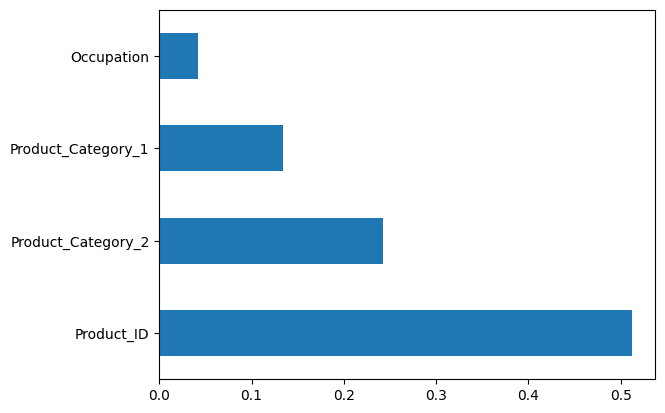

In [15]:
#Feature Selection 2

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer # Import SimpleImputer to handle NaNs

# Assuming 'X' contains categorical features, encode them:
for col in X.select_dtypes(include=['object']): # Iterate over object type(string) columns
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

#Handle the missing values
imputer = SimpleImputer(strategy='mean') # Replace NaNs using the mean of the column
X_imputed = imputer.fit_transform(X) # Apply the imputation

# Drop the rows in X_imputed that correspond to the dropped rows in Y
X_imputed = X_imputed[Y.index] # Align X_imputed with Y

model = ExtraTreesClassifier()
model.fit(X_imputed,Y) # Fit the model using the imputed data
print(model.feature_importances_)

feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance.nlargest(4).plot(kind='barh')
plt.show()

In [20]:
#Numerical to Categorical

from sklearn.preprocessing import LabelEncoder

# Commenting out the problematic lines
# df['Product_ID']=pd.cut(df['Product_ID'],3,labels=['0','1','2'])
# df['Gender']=pd.cut(df['Gender'],3,labels=['0','1','2'])
# df['Age']=pd.cut(df['Age'],3,labels=['0','1','2'])
# df['Occupation']=pd.cut(df['Occupation'],3,labels=['0','1','2'])

# If you intend to convert numerical columns to categories,
# identify the appropriate numerical columns in your DataFrame and apply pd.cut to those.
# For example, if 'Purchase' is a numerical column:
# df['Purchase'] = pd.cut(df['Purchase'], 3, labels=['0', '1', '2'])

print(df)

X = df.drop('User_ID', axis=1)  # Change 'User_Id' to 'User_ID'
X = X.drop('Product_Category_3', axis=1)
Y = df['Product_Category_3']
print(Y)
le=LabelEncoder()
le.fit(Y)
Y = le.transform(Y)
print(Y)

        User_ID Product_ID Gender    Age  Occupation City_Category  \
0       1000004  P00128942      M  46-50           7             B   
1       1000009  P00113442      M  26-35          17             C   
2       1000010  P00288442      F  36-45           1             B   
3       1000010  P00145342      F  36-45           1             B   
4       1000011  P00053842      F  26-35           1             C   
...         ...        ...    ...    ...         ...           ...   
233594  1006036  P00118942      F  26-35          15             B   
233595  1006036  P00254642      F  26-35          15             B   
233596  1006036  P00031842      F  26-35          15             B   
233597  1006037  P00124742      F  46-50           1             C   
233598  1006039  P00316642      F  46-50           0             B   

       Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                               2               1                   1   
1            

In [21]:
#Categorical to Numerical

le=LabelEncoder()
le.fit(Y)
Y = le.transform(Y)


In [23]:
#Dealing with missing values

print(df.isnull().sum())

#Verify the column name
print(df.columns) # Print the available columns to check for typos

# Assuming 'Item_Weight' is the correct column name, proceed with filling missing values
if 'Item_Weight' in df.columns:
    df['Item_Weight'].fillna((df['Item_Weight'].mean()), inplace=True) #Imputing Numerical Values

if 'Outlet_Size' in df.columns:
    df['Outlet_Size'].fillna(('Medium'), inplace=True)  #Imputing Categorical Values

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64
Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')


Counter({15: 162562, 8: 162562, 11: 162562, 5: 162562, 12: 162562, 10: 162562, 1: 162562, 0: 162562, 2: 162562, 4: 162562, 13: 162562, 9: 162562, 7: 162562, 6: 162562, 3: 162562, 14: 162562})
Counter({15: 162562, 8: 162562, 11: 162562, 5: 162562, 12: 162562, 10: 162562, 1: 162562, 0: 162562, 2: 162562, 4: 162562, 13: 162562, 9: 162562, 7: 162562, 6: 162562, 3: 162562, 14: 162562})


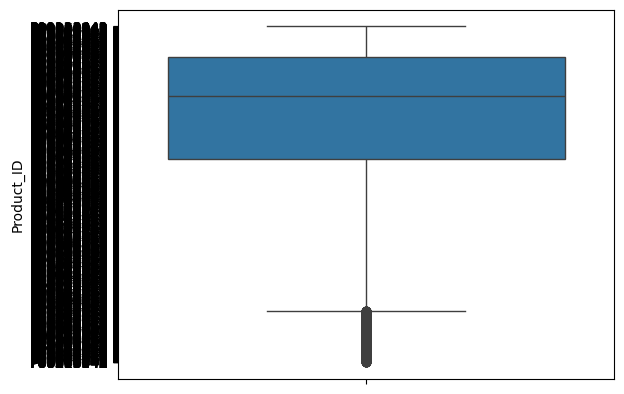

In [26]:
#Oversampling and Under Sampling

#a = (df['Product_Category_3'] == '15').sum()
#print(a)
from collections import Counter
print(Counter(Y))
from imblearn.over_sampling import RandomOverSampler     #Random OverSampling
ros=RandomOverSampler(random_state=0)
X, Y = ros.fit_resample(X,Y)
print(Counter(Y))



from imblearn.over_sampling import SMOTE                 #Synthetic Minority Oversampling (SMOTE) oversampling
sms=SMOTE(random_state=0)

# Drop non-numeric columns before applying SMOTE
X_numeric = X.select_dtypes(exclude=['object'])

# Fill NaN values in the numeric DataFrame
X_numeric = X_numeric.fillna(X_numeric.mean()) # Impute missing values with the mean of each column

X_resampled, Y_resampled = sms.fit_resample(X_numeric, Y)

# Optionally, add the non-numeric columns back after resampling if needed.
# Be mindful of how this might affect your analysis as the non-numeric
# columns won't have been oversampled.

from imblearn.under_sampling import RandomUnderSampler   #Random UnderSampling
rus=RandomUnderSampler(random_state=0)
X, Y=rus.fit_resample(X_resampled, Y_resampled)

#Identifying Outliers by ploting

from matplotlib import pyplot as plt
import seaborn as sns
sns.boxplot(df['Product_ID'])
plt.show()

In [28]:
#Dealing with Outliers using Interquantile Range

# Convert 'Product_ID' to numeric if it contains string representations of numbers
df['Product_ID'] = pd.to_numeric(df['Product_ID'], errors='coerce')

print(df['Product_ID'])
Q1 = df['Product_ID'].quantile(0.25)
Q3 = df['Product_ID'].quantile(0.75)

IQR = Q3 - Q1
print(IQR)

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

print(upper)
print(lower)

out1=df[df['Product_ID'] < lower].values
out2=df[df['Product_ID'] > upper].values

df['Product_ID'].replace(out1,lower,inplace=True)
df['Product_ID'].replace(out2,upper,inplace=True)

print(df['Product_ID'])

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
233594   NaN
233595   NaN
233596   NaN
233597   NaN
233598   NaN
Name: Product_ID, Length: 233599, dtype: float64
nan
nan
nan
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
233594   NaN
233595   NaN
233596   NaN
233597   NaN
233598   NaN
Name: Product_ID, Length: 233599, dtype: float64


In [45]:
#Principal Component Analysis

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

logr=LogisticRegression()
pca=PCA(n_components=2)

X = df.drop('User_Id', axis=1)
X = X.drop('Product_Category_3', axis=1)
Y = df['Product_Category_3']

pca.fit(X)
X=pca.transform(X)

print(X)

X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=0,test_size=0.3)

logr.fit(X_train,y_train)

y_pred=logr.predict(X_test)
print(accuracy_score(y_test,y_pred))


KeyError: "['User_Id'] not found in axis"

In [48]:
#Clustering

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

KM= KMeans(n_clusters=3, random_state=0)
iris = load_iris() # Load the iris dataset
x = iris.data

X_train,X_test=train_test_split(x,random_state=0)

KM.fit(X_train)

y_pred=KM.predict(X_test)

center=KM.cluster_centers_

print(center)
print(y_pred)

[[4.9972973  3.38918919 1.45405405 0.24054054]
 [5.84390244 2.7097561  4.32926829 1.40731707]
 [6.90588235 3.09705882 5.70294118 2.07058824]]
[1 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 2 1 0 1 2 1 0
 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


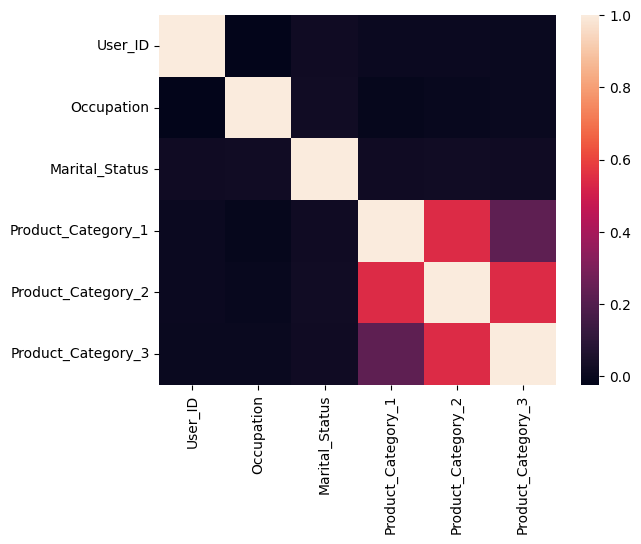

In [53]:
import pandas as pd              #pd is an Alias
from matplotlib import pyplot as plt
import seaborn as sns


df=pd.read_csv("test.csv")


#Preparing X and Y

X = df.drop('User_ID', axis=1) # Changed 'User_Id' to 'User_ID'
X = X.drop('Product_Category_3', axis=1)
Y = df['Product_Category_3']



'''
#Scatter Plot to find correlations between two continuous variables
plt.scatter(df["PetalLengthCm"], df["PetalWidthCm"])
plt.title("Scatter Plot")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()
'''

'''
#Histrogram shows the distribution of a continuous variable.  It can discover the frequency distribution for a single variable in a univariate analysis.
plt.hist(df["SepalWidthCm"])
plt.title("Histogram Plot")
plt.xlabel("Sepal Width")
plt.ylabel("Frequency")
plt.show()
'''

'''
#Bar Chart or Bar Plot is used to represent categorical data with vertical or horizontal bars.
sns.barplot(df["Species"], df["PetalLengthCm"])
plt.title("Bar Plot")
plt.show()
'''

'''
#Pie Chart is a type of plot which is used to represent the proportion of each category in categorical data.
mylabels = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
sizes = [50, 50, 50]
plt.pie(sizes, labels=mylabels, explode=(0.1, 0.1, 0.1))
plt.axis('equal')
plt.show()
'''

'''
#Count Plot s similar to a bar plot except that we only pass the X-axis and Y-axis represents explicitly counting the number of occurrences. Each bar represents count for each category of species.
sns.countplot(x='Species', data = df)
plt.title("Count Plot for Species")
plt.show()
'''

'''
#Box Plot Boxplot is used to show the distribution of a variable. The box plot is a standardized way of displaying the distribution of data based on the five-number summary: minimum, first quartile, median, third quartile, and maximum.
sns.boxplot(x='SepalLengthCm', data = df) #if x horizontal and if y vertical
plt.title("Box plot showing the distribution of Sepal Length")
plt.show()
'''


#Heatmap is a type of Matrix plot that allows you to plot data as color-encoded matrices. It is mostly used to find multi-collinearity in a dataset.
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr())
plt.show()


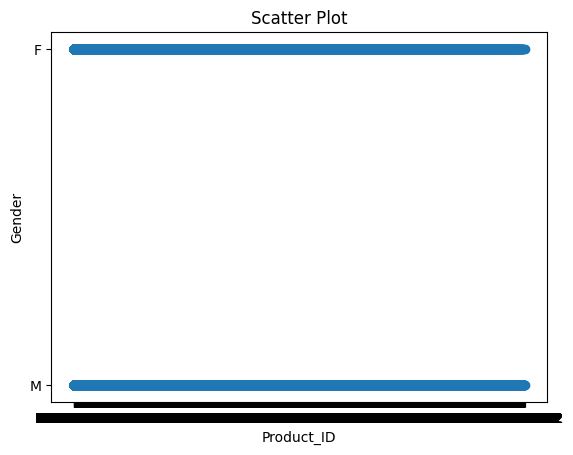

In [54]:
#Scatter Plot to find correlations between two continuous variables
plt.scatter(df["Product_ID"], df["Gender"])
plt.title("Scatter Plot")
plt.xlabel("Product_ID")
plt.ylabel("Gender")
plt.show()

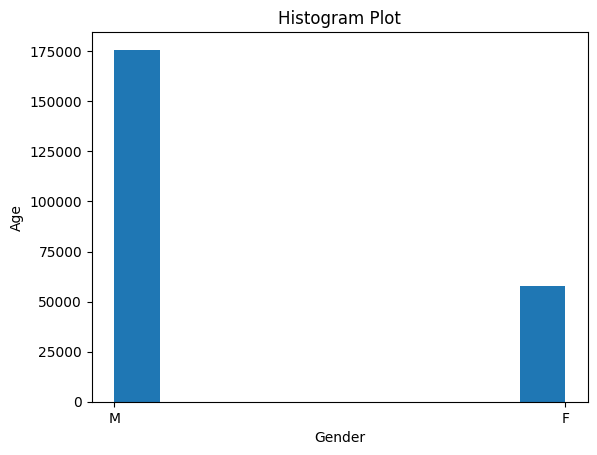

In [55]:
#Histrogram shows the distribution of a continuous variable.  It can discover the frequency distribution for a single variable in a univariate analysis.
plt.hist(df["Gender"])
plt.title("Histogram Plot")
plt.xlabel("Gender")
plt.ylabel("Age")
plt.show()


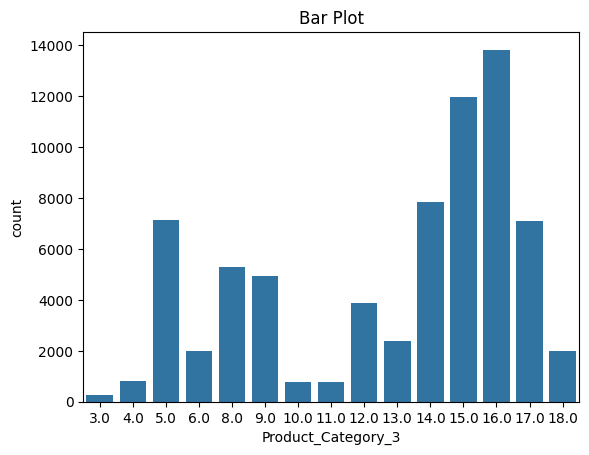

In [57]:
#Bar Chart or Bar Plot is used to represent categorical data with vertical or horizontal bars.
sns.countplot(x='Product_Category_3', data=df)  # Count the occurrences of each category
plt.title("Bar Plot")
plt.show()

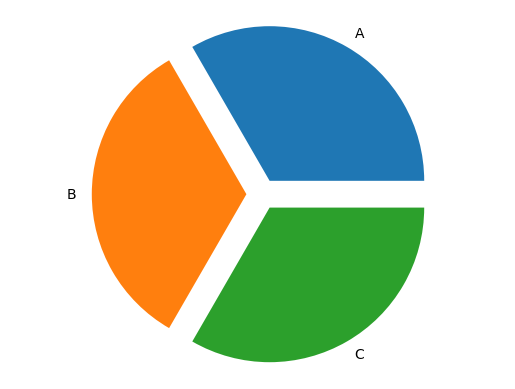

In [58]:
#Pie Chart is a type of plot which is used to represent the proportion of each category in categorical data.
mylabels = ["A", "B", "C"]
sizes = [50, 50, 50]
plt.pie(sizes, labels=mylabels, explode=(0.1, 0.1, 0.1))
plt.axis('equal')
plt.show()

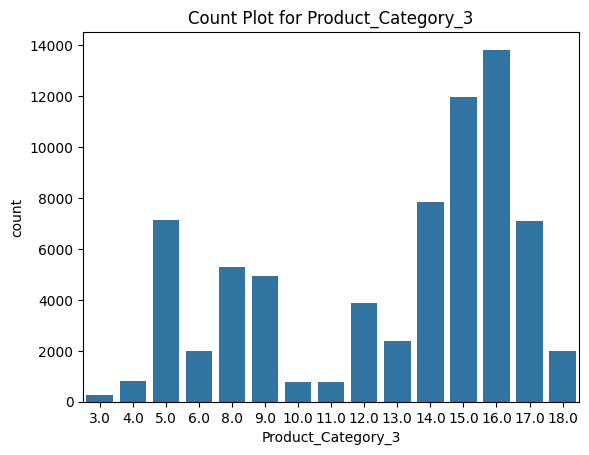

In [59]:
#Count Plot s similar to a bar plot except that we only pass the X-axis and Y-axis represents explicitly counting the number of occurrences. Each bar represents count for each category of species.
sns.countplot(x='Product_Category_3', data = df)
plt.title("Count Plot for Product_Category_3")
plt.show()

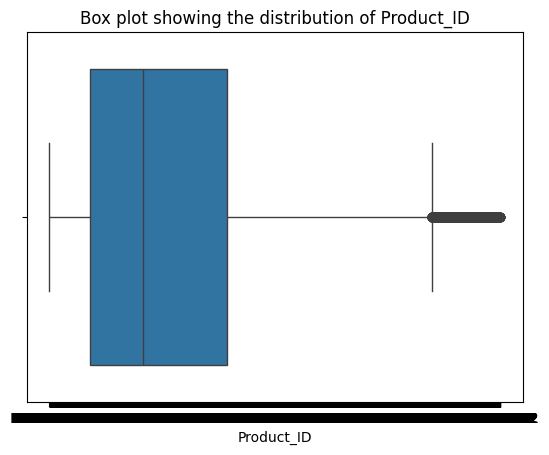

In [60]:
#Box Plot Boxplot is used to show the distribution of a variable. The box plot is a standardized way of displaying the distribution of data based on the five-number summary: minimum, first quartile, median, third quartile, and maximum.
sns.boxplot(x='Product_ID', data = df) #if x horizontal and if y vertical
plt.title("Box plot showing the distribution of Product_ID")
plt.show()